# The Cinematic Nexus: Unveiling the Future of Movie Recommendations and Analysis

by Anthony Amadasun

## 1.1 Data Cleaning and EDA 

---

### 1.1.1 Introduction




In this section, the project will detail the process of acquiring and preparing the data for our movie recommendation system. This includes data gathering, cleaning, and conducting exploratory data analysis.

---

#### Imports

In [1]:
#pip install tmdbsimple

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


import requests
import time

import getpass
import tmdbsimple as tmdb

#for transaction log
import datetime
import json

### 1.1.2 Data Collection

This project use the TMDB API to collect comprehensive movie data, ensuring a diverse and representative dataset for our recommendation system.

**Deliverables:**
- Retrieve movie data from TMDB API, ensuring comprehensive coverage of movie details.
- Validate the integrity of the dataset to avoid missing or incomplete information.
- Handle any API rate limitations, ensuring a smooth and ethical interaction with the TMDB API.

---

In [3]:
# This function uses the tmdbsimple library to interact with TMDB API
def collect_movie_data(api_key, num_movies=1000):
    tmdb.API_KEY = api_key

    # Loop to collect data until reaching the desired number of movies
    movies_data = []
    page = 1
    cumulative_movies_retrieved = 0

    while len(movies_data) < num_movies:
        try:
            response = tmdb.Discover().movie(sort_by='popularity.desc', page=page)
            if not response['results']:
                break
            page += 1
            movies_data.extend(response['results'])
            cumulative_movies_retrieved += len(response['results'])
            time.sleep(0.5)  # handles rate limitation
        except Exception as e:
            print(f"Error: {e}")
            break

        # Log transaction details
        transaction_log = {
            'execution_datetime': str(datetime.datetime.now()),
            'movies_retrieved': len(movies_data),
            'total_movies_retrieved_to_date': cumulative_movies_retrieved + len(movies_data)
        }

        # Writing to a JSON file
        with open('../data/transaction_log_movies.json', 'a') as log_file:
            log_file.write(json.dumps(transaction_log) + '\n')

    # real-time updates
#     with open('../data/transaction_log_movies.json', 'r') as log_file:
#         logs = log_file.readlines()

#         for log in logs:
#             print(log)

    return movies_data


In [4]:
api_key = getpass.getpass(prompt="Enter your TMDB API key:")

Enter your TMDB API key: ········


In [5]:
movie_data = collect_movie_data(api_key, num_movies=5000)

In [6]:
#create dataframe for the movie data
tmdb_df = pd.DataFrame(movie_data)

In [7]:
#check first 5 rows
tmdb_df.head()

adult                     backdrop_path        genre_ids       id  \
0  False  /pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg    [878, 28, 18]   933131   
1  False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg     [28, 53, 18]   866398   
2  False  /unvtbkgxh47BewQ8pENvdOdme0r.jpg         [28, 18]  1212073   
3  False  /yyFc8Iclt2jxPmLztbP617xXllT.jpg  [35, 10751, 14]   787699   
4  False  /rz8GGX5Id2hCW1KzAIY4xwbQw1w.jpg     [28, 35, 80]   955916   

  original_language original_title  \
0                ko             황야   
1                en  The Beekeeper   
2                de     60 Minuten   
3                en          Wonka   
4                en           Lift   

                                            overview  popularity  \
0  After a deadly earthquake turns Seoul into a l...    2960.320   
1  One man’s campaign for vengeance takes on nati...    1454.430   
2  Desperate to keep custody of his daughter, a m...    1787.516   
3  Willy Wonka – chock-full of ideas and determin...    1545.789   
4  An international heist crew, led by Cyrus Whit...    1297.755   

                        poster_path release_date            title  video  \
0  /zVMyvNowgbsBAL6O6esWfRpAcOb.jpg   2024-01-26  Badland Hunters  False   
1  /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10    The Beekeeper  False   
2  /jojfbnIHGsRpodIood3OQoqA45Y.jpg   2024-01-19    Sixty Minutes  False   
3  /qhb1qOilapbapxWQn9jtRCMwXJF.jpg   2023-12-06            Wonka  False   
4  /46sp1Z9b2PPTgCMyA87g9aTLUXi.jpg   2024-01-10             Lift  False   

   vote_average  vote_count  
0         6.900         264  
1         7.286         949  
2         7.008         243  
3         7.212        1988  
4         6.583         721

In [8]:
#retrieve additional information such as directors and cast for the movies.
#https://developer.themoviedb.org/docs/append-to-response

for movie_id in tmdb_df['id']:
    # Make a request to the /credits endpoint for each movie
    credits_url = f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key=80c789bfee481fd91466be1937d446c3'
    credits_response = requests.get(credits_url)
    
    # Checking if the request was successful
    if credits_response.status_code == 200:
        # Parsing the response JSON to extract director and cast information
        credits_data = credits_response.json()
        directors = [crew['name'] for crew in credits_data['crew'] if crew['job'] == 'Director']
        cast = [cast_member['name'] for cast_member in credits_data['cast']]
        
        # Update DataFrame with the obtained information
        # e.g., create new columns directors and cast
        tmdb_df.loc[tmdb_df['id'] == movie_id, 'directors'] = ', '.join(directors)
        tmdb_df.loc[tmdb_df['id'] == movie_id, 'cast'] = ', '.join(cast)
    else:
        print(f"Failed to retrieve credits for movie ID {movie_id}")




In [9]:
tmdb_df.head()

adult                     backdrop_path        genre_ids       id  \
0  False  /pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg    [878, 28, 18]   933131   
1  False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg     [28, 53, 18]   866398   
2  False  /unvtbkgxh47BewQ8pENvdOdme0r.jpg         [28, 18]  1212073   
3  False  /yyFc8Iclt2jxPmLztbP617xXllT.jpg  [35, 10751, 14]   787699   
4  False  /rz8GGX5Id2hCW1KzAIY4xwbQw1w.jpg     [28, 35, 80]   955916   

  original_language original_title  \
0                ko             황야   
1                en  The Beekeeper   
2                de     60 Minuten   
3                en          Wonka   
4                en           Lift   

                                            overview  popularity  \
0  After a deadly earthquake turns Seoul into a l...    2960.320   
1  One man’s campaign for vengeance takes on nati...    1454.430   
2  Desperate to keep custody of his daughter, a m...    1787.516   
3  Willy Wonka – chock-full of ideas and determin...    1545.789   
4  An international heist crew, led by Cyrus Whit...    1297.755   

                        poster_path release_date            title  video  \
0  /zVMyvNowgbsBAL6O6esWfRpAcOb.jpg   2024-01-26  Badland Hunters  False   
1  /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10    The Beekeeper  False   
2  /jojfbnIHGsRpodIood3OQoqA45Y.jpg   2024-01-19    Sixty Minutes  False   
3  /qhb1qOilapbapxWQn9jtRCMwXJF.jpg   2023-12-06            Wonka  False   
4  /46sp1Z9b2PPTgCMyA87g9aTLUXi.jpg   2024-01-10             Lift  False   

   vote_average  vote_count         directors  \
0         6.900         264  Heo Myeong-haeng   
1         7.286         949        David Ayer   
2         7.008         243     Oliver Kienle   
3         7.212        1988         Paul King   
4         6.583         721      F. Gary Gray   

                                                cast  
0  Ma Dong-seok, Lee Hee-jun, Lee Jun-young, Roh ...  
1  Jason Statham, Emmy Raver-Lampman, Bobby Nader...  
2  Emilio Sakraya, Dennis Mojen, Marie Mouroum, F...  
3  Timothée Chalamet, Calah Lane, Keegan-Michael ...  
4  Kevin Hart, Gugu Mbatha-Raw, Sam Worthington, ...

In [10]:
#display basic information
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              5000 non-null   bool   
 1   backdrop_path      4922 non-null   object 
 2   genre_ids          5000 non-null   object 
 3   id                 5000 non-null   int64  
 4   original_language  5000 non-null   object 
 5   original_title     5000 non-null   object 
 6   overview           5000 non-null   object 
 7   popularity         5000 non-null   float64
 8   poster_path        4993 non-null   object 
 9   release_date       5000 non-null   object 
 10  title              5000 non-null   object 
 11  video              5000 non-null   bool   
 12  vote_average       5000 non-null   float64
 13  vote_count         5000 non-null   int64  
 14  directors          5000 non-null   object 
 15  cast               5000 non-null   object 
dtypes: bool(2), float64(2), 

In [11]:
#check shape
tmdb_df.shape

(5000, 16)

In [12]:
#check the data type
tmdb_df.dtypes

adult                   bool
backdrop_path         object
genre_ids             object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
poster_path           object
release_date          object
title                 object
video                   bool
vote_average         float64
vote_count             int64
directors             object
cast                  object
dtype: object

In [13]:
#Check for missing values in each columns
tmdb_df.isnull().sum()

adult                 0
backdrop_path        78
genre_ids             0
id                    0
original_language     0
original_title        0
overview              0
popularity            0
poster_path           7
release_date          0
title                 0
video                 0
vote_average          0
vote_count            0
directors             0
cast                  0
dtype: int64

In [14]:
#check for duplicates
print(f'number of duplicates in overview: {tmdb_df["overview"].duplicated().sum()}')
print(f'number of duplicates in title: {tmdb_df["title"].duplicated().sum()}')

number of duplicates in overview: 248
number of duplicates in title: 331


### 1.1.3 Data Cleaning and EDA

**Data Cleaning Deliverables:**

- Address missing or inconsistent data entries by applying appropriate imputation techniques.
- Standardize and clean data formats, ensuring consistency across different data fields.
- Handle outliers and anomalies that might impact the accuracy of recommendations.
- Normalize numerical features for better model performance.

**EDA Deliverables:**

- Conduct a thorough exploration of the dataset to gain insights into movie trends and characteristics.
- Analyze distributions of key variables such as genre, release year, and user ratings.
- Visualize the relationships between different features to identify potential patterns or correlations.
- Extract meaningful statistics to inform the modeling process.

**Dictionary**

- **Popularity:** The popularity of a movie is a metric that represents its relative popularity compared to other movies in the dataset. Popularity values are often influenced by various factors like social media mentions, views, and user interactions. Higher popularity values typically indicate that a movie is more widely known or discussed.
- **Vote Count:** The vote count represents the number of votes a movie has received. It's a measure of user engagement or participation. Higher vote counts generally indicate that more users have expressed their opinion about the movie by voting.
- **Vote Average:** The vote average is the average rating given to a movie by users who have voted. It is a measure of the overall rating or satisfaction level of a movie. Higher vote average values suggest that the movie has received more positive ratings from users.

---

In [15]:
#descriptive statistic
tmdb_df.describe()

id   popularity  vote_average    vote_count
count  5.000000e+03  5000.000000   5000.000000   5000.000000
mean   3.694546e+05    48.626242      6.491061   2670.257000
std    3.733947e+05    87.600126      1.380972   3933.183614
min    1.100000e+01    13.553000      0.000000      0.000000
25%    1.146750e+04    25.047000      6.100000    248.750000
50%    2.875070e+05    32.513500      6.682000   1191.000000
75%    6.511952e+05    46.583250      7.256250   3382.000000
max    1.238486e+06  2960.320000     10.000000  35224.000000

In [16]:
#convert release_date to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')

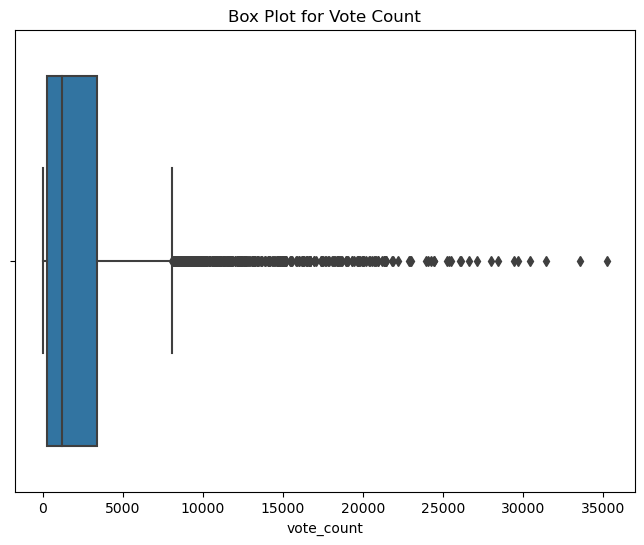

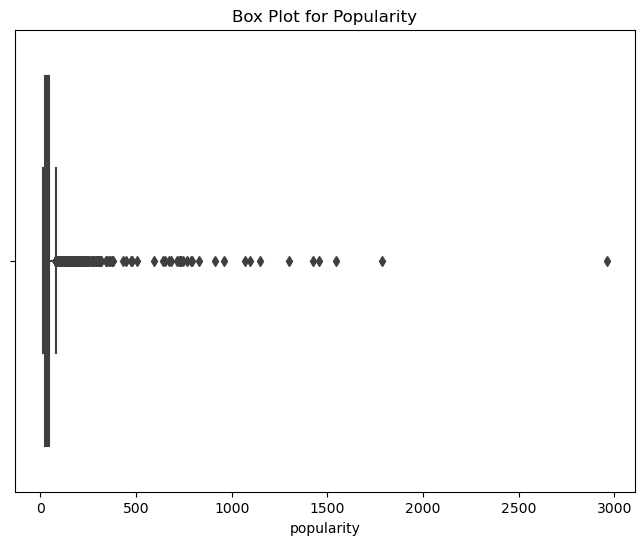

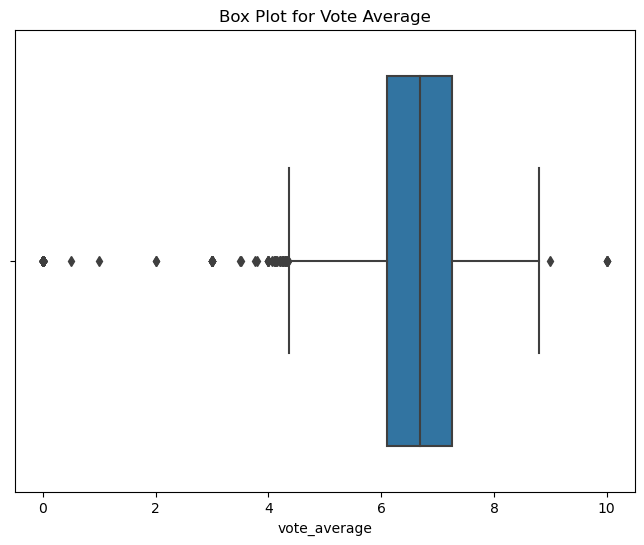

In [17]:
#box plot to check for outliers

# Box plot for vote_count
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_count'])
plt.title('Box Plot for Vote Count')
plt.savefig('../images/boxplot_vote_count.png', bbox_inches='tight')


# Box plot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['popularity'])
plt.title('Box Plot for Popularity')
plt.savefig('../images/boxplot_popularity.png', bbox_inches='tight')

plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_average'])
plt.title('Box Plot for Vote Average')
plt.savefig('../images/boxplot_vote_average.png', bbox_inches='tight')


The intution to keep outliers is based of the idea that popular movies tend to recieve higher number of votes. Removing popular movies based on vote count as outliers might not be appropriate for this recommender system as the goal of the analysis is to identify all type of movies that a users might like, rather than certain movies with a certain level of engagement. 

In [18]:
#checking duplicates in title column
title_duplicates = tmdb_df[tmdb_df.duplicated(subset='title', keep=False)]
title_duplicates

adult                     backdrop_path         genre_ids       id  \
1     False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg      [28, 53, 18]   866398   
19    False  /sRLC052ieEzkQs9dEtPMfFxYkej.jpg     [878, 18, 28]   848326   
20    False  /sRLC052ieEzkQs9dEtPMfFxYkej.jpg     [878, 18, 28]   848326   
43    False  /jYEW5xZkZk2WTrdbMGAPFuBqbDc.jpg         [878, 12]   438631   
62    False  /auXrHU6O17n9Tz11SHReoorjrU6.jpg   [16, 35, 10751]  1075794   
...     ...                               ...               ...      ...   
4959  False  /1jpIO9qYkn4CC0xO32J2fYD244W.jpg  [18, 28, 80, 27]    68635   
4960  False  /1jpIO9qYkn4CC0xO32J2fYD244W.jpg  [18, 28, 80, 27]    68635   
4989  False  /fqIPxoYomORhn7L3ewxv5bm2pAD.jpg              [27]    19185   
4991  False  /vYl59PvnUxyTRyFmruignuXLtyT.jpg      [28, 80, 53]   913604   
4993  False  /cYlvxDI16HtZ74L159LyKvxHyXU.jpg      [80, 18, 53]     9411   

     original_language                          original_title  \
1                   en                           The Beekeeper   
19                  en  Rebel Moon - Part One: A Child of Fire   
20                  en  Rebel Moon - Part One: A Child of Fire   
43                  en                                    Dune   
62                  en                                     Leo   
...                ...                                     ...   
4959                de                Frauen für Zellenblock 9   
4960                de                Frauen für Zellenblock 9   
4989                en                Night of the Living Dead   
4991                en                               Renegades   
4993                en                                  Fallen   

                                               overview  popularity  \
1     One man’s campaign for vengeance takes on nati...    1454.430   
19    When a peaceful colony on the edge of the gala...     728.700   
20    When a peaceful colony on the edge of the gala...     728.700   
43    Paul Atreides, a brilliant and gifted young ma...     287.963   
62    Jaded 74-year-old lizard Leo has been stuck in...     266.093   
...                                                 ...         ...   
4959  A group of female freedom-fighters led by Kari...      23.708   
4960  A group of female freedom-fighters led by Kari...      23.708   
4989  In this remake of the classic 1968 film, a gro...      23.855   
4991  When a retired Green Beret soldier is murdered...      17.208   
4993  Homicide detective John Hobbes witnesses the e...      25.855   

                           poster_path release_date  \
1     /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10   
19    /ui4DrH1cKk2vkHshcUcGt2lKxCm.jpg   2023-12-15   
20    /ui4DrH1cKk2vkHshcUcGt2lKxCm.jpg   2023-12-15   
43    /d5NXSklXo0qyIYkgV94XAgMIckC.jpg   2021-09-15   
62    /pD6sL4vntUOXHmuvJPPZAgvyfd9.jpg   2023-11-17   
...                                ...          ...   
4959  /c5FFvN60v6tO1iV9QDVsuGq4Tw4.jpg   1978-03-17   
4960  /c5FFvN60v6tO1iV9QDVsuGq4Tw4.jpg   1978-03-17   
4989  /isp4lCv08asTPNvv8Xe8oQK293n.jpg   1990-10-19   
4991  /7QvhJsoFbcWsrY0iXGhZTKQaQAr.jpg   2022-12-02   
4993  /nEDvTB9cP2oIKY0M1ZdDvuUEJ8d.jpg   1998-01-16   

                                       title  video  vote_average  vote_count  \
1                              The Beekeeper  False         7.286         949   
19    Rebel Moon - Part One: A Child of Fire  False         6.413        1391   
20    Rebel Moon - Part One: A Child of Fire  False         6.413        1391   
43                                      Dune  False         7.785       10018   
62                                       Leo  False         7.510         918   
...                                      ...    ...           ...         ...   
4959                    Women in Cellblock 9  False         4.446          28   
4960                    Women in Cellblock 9  False         4.446          28   
4989                Night of the Living Dead  False      

In [19]:
#checking duplicates in overview column
overview_duplicates = tmdb_df[tmdb_df.duplicated(subset='overview', keep=False)]
overview_duplicates

adult                     backdrop_path         genre_ids      id  \
19    False  /sRLC052ieEzkQs9dEtPMfFxYkej.jpg     [878, 18, 28]  848326   
20    False  /sRLC052ieEzkQs9dEtPMfFxYkej.jpg     [878, 18, 28]  848326   
94    False  /mpxTLzAs7Os3SnjtnjqZ6PzOgae.jpg    [53, 9648, 27]  888001   
116   False  /mpxTLzAs7Os3SnjtnjqZ6PzOgae.jpg    [53, 9648, 27]  888001   
119   False   /5LtSjMNw6j3LkG29Oa4O0iY5U8.jpg      [28, 12, 53]  872906   
...     ...                               ...               ...     ...   
4919  False  /26sbMdUL1MrAwVEbcRFkWHcRrGC.jpg   [10749, 53, 18]  451955   
4920  False  /iJxccKHCe1vTXtCoFezYCWDk8On.jpg       [35, 10749]    9029   
4921  False  /26sbMdUL1MrAwVEbcRFkWHcRrGC.jpg   [10749, 53, 18]  451955   
4959  False  /1jpIO9qYkn4CC0xO32J2fYD244W.jpg  [18, 28, 80, 27]   68635   
4960  False  /1jpIO9qYkn4CC0xO32J2fYD244W.jpg  [18, 28, 80, 27]   68635   

     original_language                          original_title  \
19                  en  Rebel Moon - Part One: A Child of Fire   
20                  en  Rebel Moon - Part One: A Child of Fire   
94                  lv                                  Upurga   
116                 lv                                  Upurga   
119                 hi                                    जवान   
...                ...                                     ...   
4919                fr                          L'Amant double   
4920                en                   What Happens in Vegas   
4921                fr                          L'Amant double   
4959                de                Frauen für Zellenblock 9   
4960                de                Frauen für Zellenblock 9   

                                               overview  popularity  \
19    When a peaceful colony on the edge of the gala...     728.700   
20    When a peaceful colony on the edge of the gala...     728.700   
94    Andrejs, a meticulous outdoor adventure guide,...     168.432   
116   Andrejs, a meticulous outdoor adventure guide,...     168.432   
119   An emotional journey of a prison warden, drive...     204.380   
...                                                 ...         ...   
4919  Chloé, a fragile young woman, falls in love wi...      24.138   
4920  During a wild vacation in Las Vegas, career wo...      27.384   
4921  Chloé, a fragile young woman, falls in love wi...      24.138   
4959  A group of female freedom-fighters led by Kari...      23.708   
4960  A group of female freedom-fighters led by Kari...      23.708   

                           poster_path release_date  \
19    /ui4DrH1cKk2vkHshcUcGt2lKxCm.jpg   2023-12-15   
20    /ui4DrH1cKk2vkHshcUcGt2lKxCm.jpg   2023-12-15   
94    /8Q0sJtvbhkPJ1jXzvYW7qzgcupk.jpg   2022-04-21   
116   /8Q0sJtvbhkPJ1jXzvYW7qzgcupk.jpg   2022-04-21   
119   /bilZfvrrM1YEICmj5DYVEGmGxod.jpg   2023-09-07   
...                                ...          ...   
4919  /r7va7VtatGdaMbURnKTkwiQlGrX.jpg   2017-05-26   
4920  /x3yN37OKHOzqnwa5sum8Ut4nobY.jpg   2008-05-07   
4921  /r7va7VtatGdaMbURnKTkwiQlGrX.jpg   2017-05-26   
4959  /c5FFvN60v6tO1iV9QDVsuGq4Tw4.jpg   1978-03-17   
4960  /c5FFvN60v6tO1iV9QDVsuGq4Tw4.jpg   1978-03-17   

                                       title  video  vote_average  vote_count  \
19    Rebel Moon - Part One: A Child of Fire  False         6.413        1391   
20    Rebel Moon - Part One: A Child of Fire  False         6.413        1391   
94                             River of Fear  False         6.100          20   
116                            River of Fear  False         6.100          20   
119                                    Jawan  False         7.217         189   
...                                      ...    ...           ...         ...   
4919                            Double Lover  False         6.084         500   
4920                   What Happens in Vegas  False         6.100        2916   
4921                            Double Lover  False         6.084    

The duplicates found in overview and title is related to having nothing filled out in it columns, having different production year (but same name) or having same title and overview, but different feature (e.g., korean version, vote average, etc.) As a result the duplicates are not genuinely redundant and they are worth keep as they provide additional information.

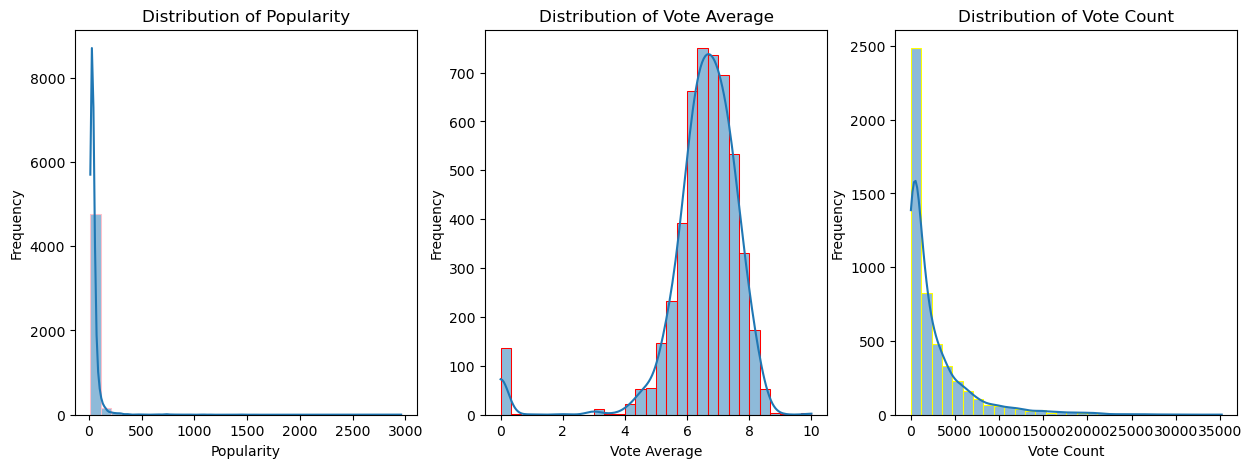

In [20]:
# #check distribution to see if the distribution is already well-behaved 
# #and within a reasonable range

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograms with KDE for 'popularity', 'vote_average', and 'vote_count'
sns.histplot(tmdb_df['popularity'], bins=30, kde=True, edgecolor='pink', ax=axes[0])
axes[0].set_title('Distribution of Popularity')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Frequency')

sns.histplot(tmdb_df['vote_average'], bins=30, kde=True, edgecolor='red', ax=axes[1])
axes[1].set_title('Distribution of Vote Average')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Frequency')

sns.histplot(tmdb_df['vote_count'], bins=30, kde=True, edgecolor='yellow', ax=axes[2])
axes[2].set_title('Distribution of Vote Count')
axes[2].set_xlabel('Vote Count')
axes[2].set_ylabel('Frequency')

plt.savefig('../images/distribution.png', bbox_inches='tight')



In [21]:
#Normalize numerical features for better model performance
scaler = MinMaxScaler()

tmdb_df['popularity_normalized'] = scaler.fit_transform(tmdb_df[['popularity']])


tmdb_df['vote_count_normalized'] = scaler.fit_transform(tmdb_df[['vote_count']])

tmdb_df['vote_average_normalized'] = scaler.fit_transform(tmdb_df[['vote_average']])

**Interpretation**

Normalization was implemented because of the wide range and variability in popularity and vote count (minimum popularity is 18.09 and maximum is 4578.60 | the minimum vote count is 0, and the maximum is 35205 which indicates large range of values).

The distribution of popularity and vote count is right skewed, which in the case of popularity, it suggests that there are a few movies that are extremely popular. While in the case of vote_count, it suggests that there are a few movies with exceptionally high vote counts. The distribution of vote averages is left skewed, which indicates that there might be a concentration of movies with higher ratings 

**Visualize Genre**

In [22]:
#Explore the genres
genre_counts = tmdb_df['genre_ids'].explode().value_counts()
genre_counts

genre_ids
18       1745
28       1677
35       1449
53       1399
12       1182
14        788
27        768
16        763
10751     763
878       758
80        683
10749     668
9648      449
36        171
10752     153
10402      95
37         80
10770      74
99         54
Name: count, dtype: int64

In [23]:
#https://developer.themoviedb.org/reference/genre-movie-list
#map genre IDS to names 
genre_mapping = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

In [24]:
#map genre IDS to name in the Dataframe
tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda ids: [genre_mapping[id] for id in ids])

In [25]:
#after mapping
genre_counts2 = tmdb_df['genre_names'].explode().value_counts()
genre_counts2

genre_names
Drama              1745
Action             1677
Comedy             1449
Thriller           1399
Adventure          1182
Fantasy             788
Horror              768
Animation           763
Family              763
Science Fiction     758
Crime               683
Romance             668
Mystery             449
History             171
War                 153
Music                95
Western              80
TV Movie             74
Documentary          54
Name: count, dtype: int64

In [26]:
genre_counts2

genre_names
Drama              1745
Action             1677
Comedy             1449
Thriller           1399
Adventure          1182
Fantasy             788
Horror              768
Animation           763
Family              763
Science Fiction     758
Crime               683
Romance             668
Mystery             449
History             171
War                 153
Music                95
Western              80
TV Movie             74
Documentary          54
Name: count, dtype: int64

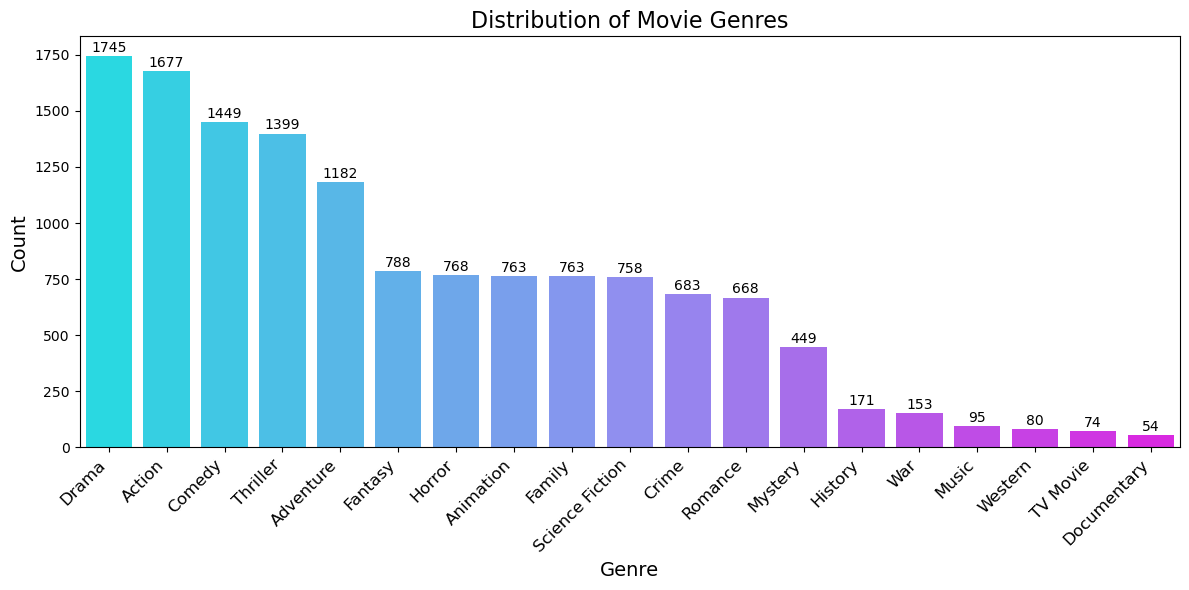

In [27]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=genre_counts2.index, y=genre_counts2.values, palette='cool')
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(genre_counts2.values):
    bar_plot.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../images/dist_movie_genre.png', bbox_inches='tight')


The chart provides an overview of the frequency of different genres in the dataset. Action emerges as the most prevalent genre, with a count of 1123. Following action, drama, comedy, adventure, and thriller are among the top genres, illustrating their popularity and frequent occurrence in the dataset. 

**Visualize Release Year**

In [28]:
#create new column that shows the release year
tmdb_df['release_year'] = pd.to_datetime(tmdb_df['release_date']).dt.year


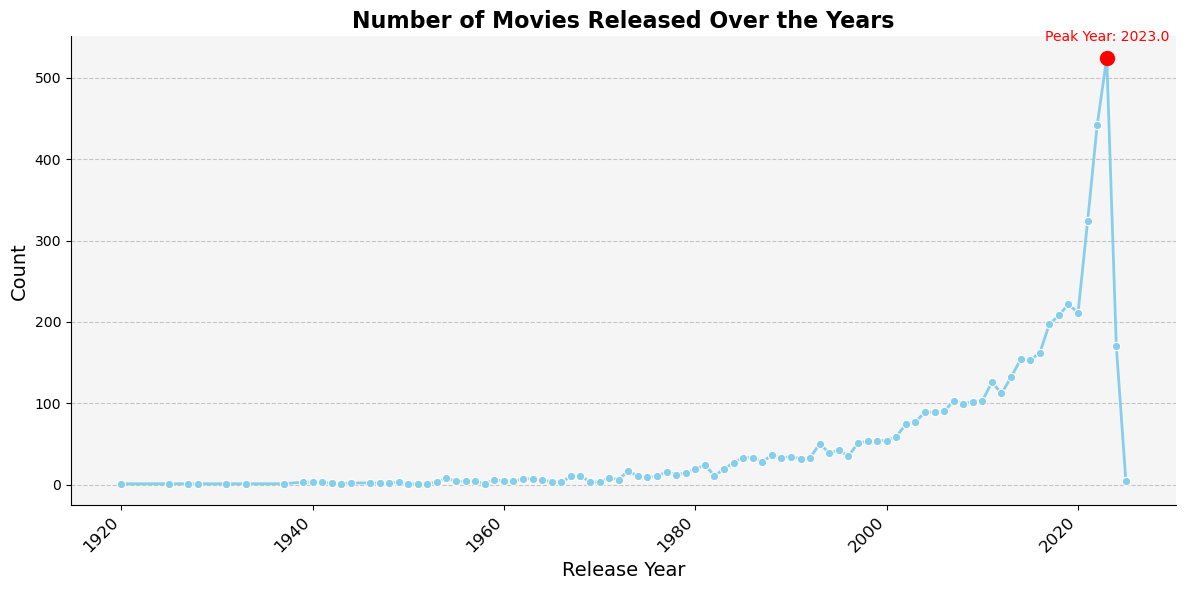

In [29]:
# Explore release years
release_year_counts = tmdb_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=release_year_counts.index, y=release_year_counts.values,
                         marker='o', color='skyblue', linewidth=2)
#highlight the peak year with red mark
peak_year = release_year_counts.idxmax()
plt.scatter(peak_year, release_year_counts.max(), color='red', s=100, zorder=5)

#annotate the peak year
plt.text(peak_year, release_year_counts.max() + 20, f'Peak Year: {peak_year}', 
         color='red', ha='center', fontsize=10)
plt.title('Number of Movies Released Over the Years', fontsize=16, weight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

#background customization
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.savefig('../images/movies_release_year.png', bbox_inches='tight')




The line plot provides a temporal exploration of movie releases within the dataset. The chart offers insights into the temporal distribution of movies, spanning from 1900 to 2026. The red marker highlights the peak year with the highest number of movie releases. In this case, 2023 stands out as the year with the maximum movie releases, with a count of 424. As such, the dataset has a lot of movies for that particular year followed by 2022, 2021, and 2018.

In [30]:
release_year_counts.sort_values(ascending=False)

release_year
2023.0    525
2022.0    442
2021.0    324
2019.0    222
2020.0    211
         ... 
1950.0      1
1951.0      1
1952.0      1
1958.0      1
1920.0      1
Name: count, Length: 93, dtype: int64

**Relationship between Popularity, Genre, User Rating and Vote Count**

In [31]:
#make a string column for genre name to be able to visualize it bc unhasable type error
tmdb_df['genre_ids_str'] = tmdb_df['genre_names'].astype(str)

In [32]:
#bc of large number of unique genre and title type, minimized the ones selected

#most frequent occuring
top_genres = tmdb_df['genre_ids_str'].value_counts().head(40).index
#highest average genre by popularity
top_genres2 = tmdb_df.groupby('genre_ids_str')['popularity'].mean().nlargest(40).index
# selecting the top 40 titles with highest populaity average
top_titles = tmdb_df.nlargest(40, 'popularity')


# selecting the top 40 movies based on user rating
top_user_titles = tmdb_df.nlargest(40, 'vote_average')
# Chighest average genre by user ratings
highest_user_genres = tmdb_df.groupby('genre_ids_str')['vote_average'].mean().nlargest(40)


/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_45018/1613283255.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='popularity',


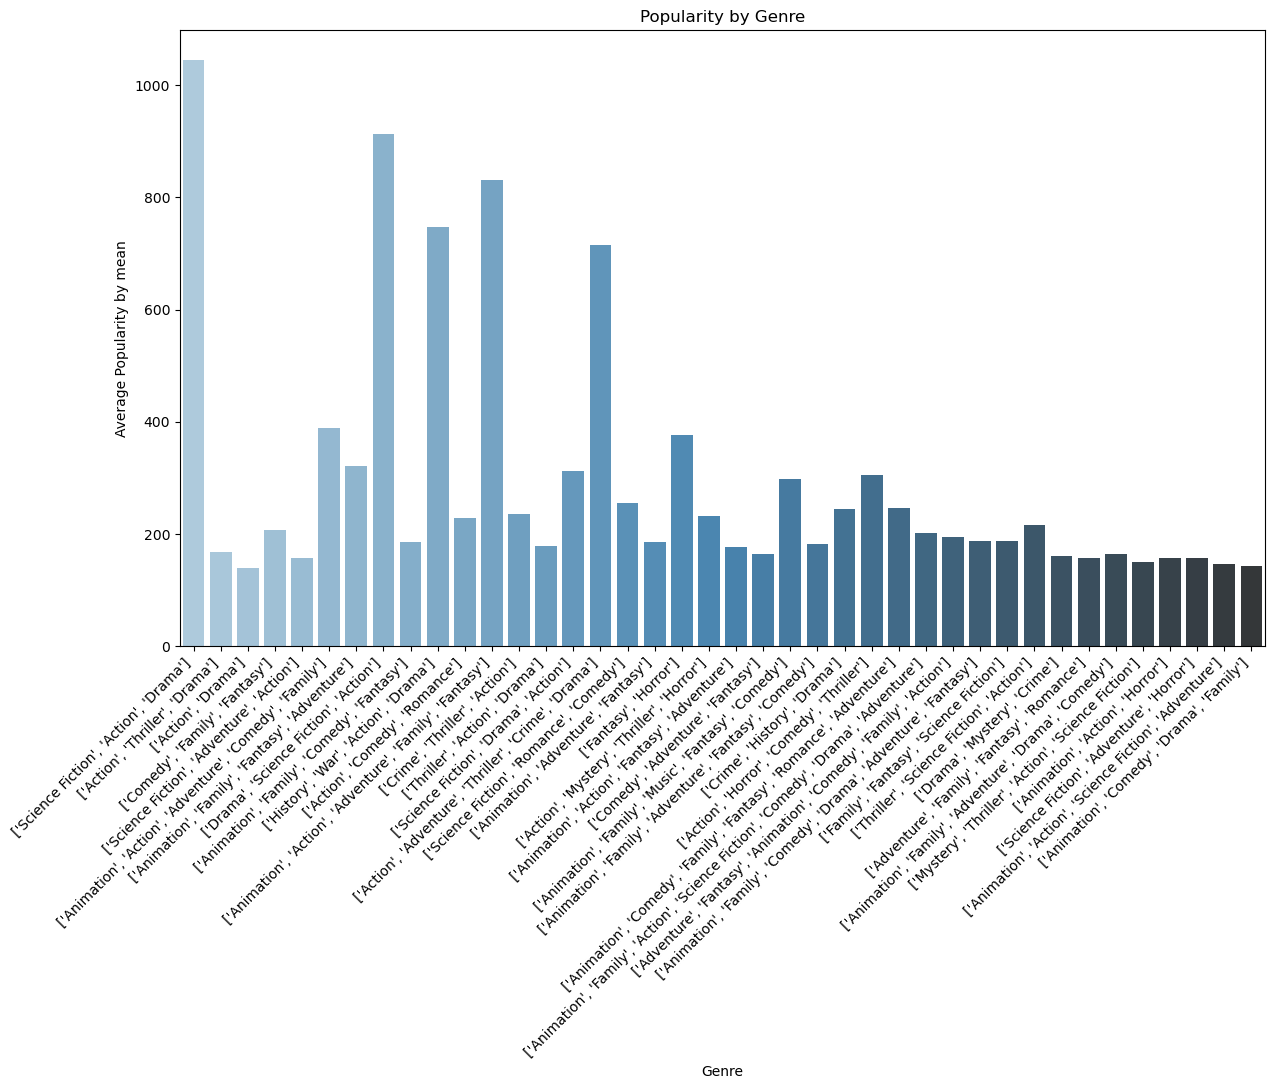

In [33]:
#genres with the highest average popularity, 
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='popularity', 
            data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres2)], ci=None, palette='Blues_d')
plt.title('Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity by mean')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40popular_movies_genre.png', bbox_inches='tight')

The chart showcases the top genres with the highest average popularity in descending order. The x-axis indicates the unique genre combination and the y-axis represents the average popularity.The genre with the highest average popularity is Crime and Action, followed by History, war, action, and drama.

In [34]:
# Visualize the top 40 most popular titles
plt.figure(figsize=(14, 8))
top_titles_plot = sns.barplot(x='title', y='popularity', 
                              data=top_titles, ci=None, palette='plasma')
top_titles_plot.set_xticklabels(top_titles_plot.get_xticklabels(), rotation=45, ha='right') 
plt.title('Top 40 Most Popular Titles')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.tight_layout()
plt.savefig('../images/top_40_popular_titles.png', bbox_inches='tight')






/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_45018/3706001854.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  top_titles_plot = sns.barplot(x='title', y='popularity',


The chart displays the popularity of the top 40 movie titles based on the 'popularity' column. The Beekeeper is the most popular title, as it has the highest bar on the chart, followed by Badland hunters. The chart showcases a diverse range of movie titles not only from america, but from other countries like korea(badland hunter), japan(The Boy and the Heron), russia(Time of Patriots), Latin America(The Society of Snow) and China (Mutant: Ghost Warrior).

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_45018/2227439708.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='popularity',


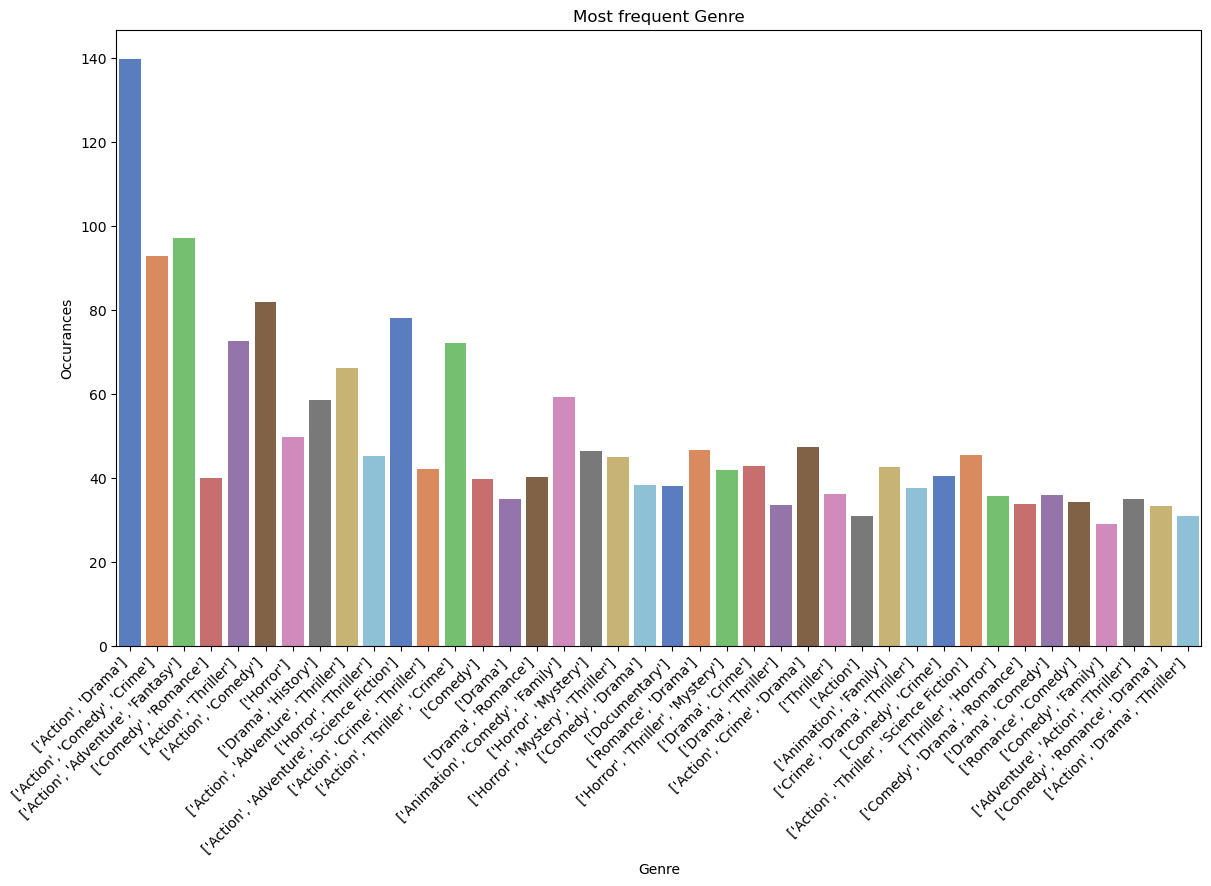

In [35]:
#visualize the top 40 most frequently occurring genres
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='popularity', 
            data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], ci=None, palette='muted')
plt.title('Most frequent Genre')
plt.xlabel('Genre')
plt.ylabel('Occurances')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40mostfrequent_genre.png', bbox_inches='tight')



The chart visualizes the frequency of occurrence for each genre among the top 40 movies

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_45018/1708878224.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='title', y='vote_average',


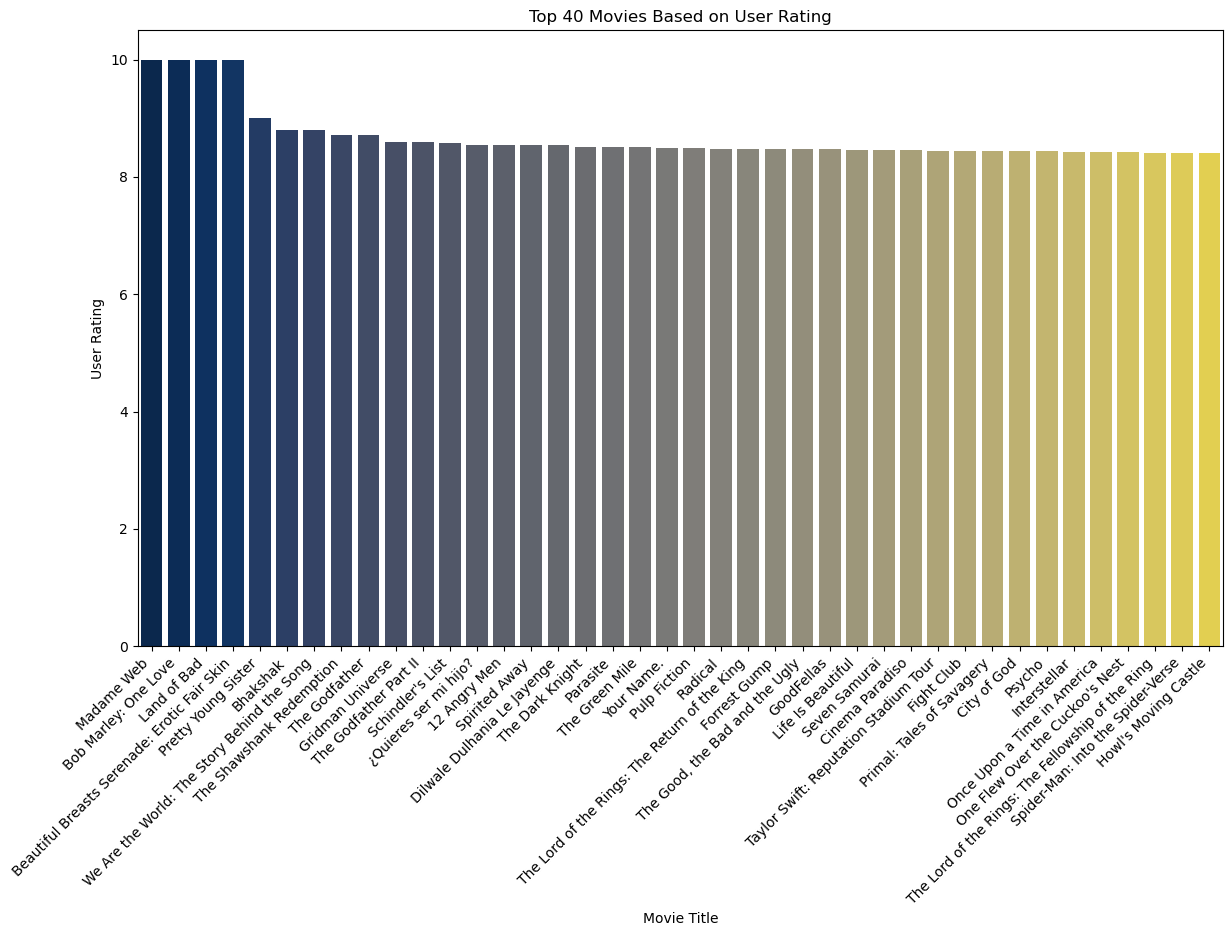

In [36]:
#top movies based on user rating
plt.figure(figsize=(14, 8))
sns.barplot(x='title', y='vote_average', 
            data=top_user_titles, ci=None, palette='cividis')
plt.title('Top 40 Movies Based on User Rating')
plt.xlabel('Movie Title')
plt.ylabel('User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/top40_user_rated_movies.png', bbox_inches='tight')

The barplot visualizes the average user ratings for the top 40 movies.Bob Marley: One Love and the korean film, the Female Boss Hooker have perfect 10 scores when it comes to user rating.

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_45018/4116190094.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='vote_average', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)],


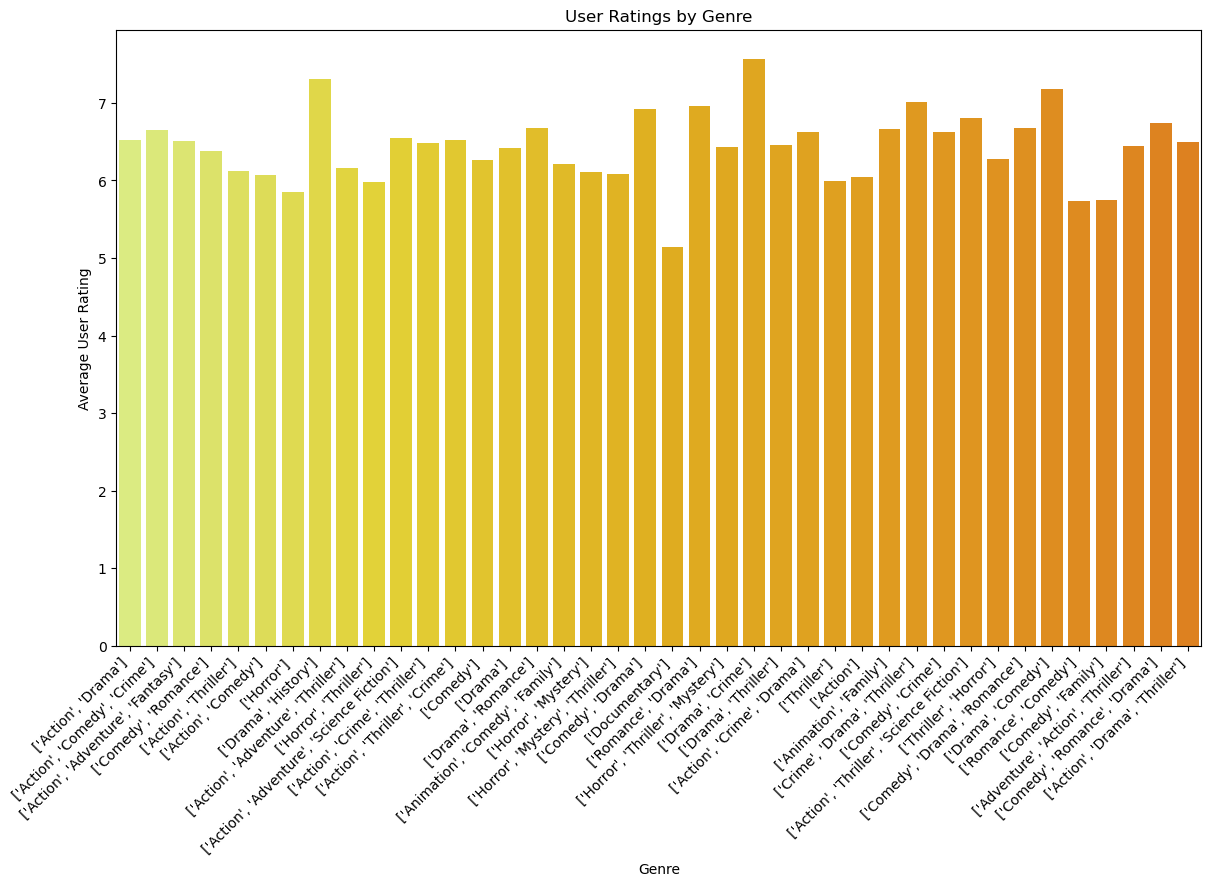

In [37]:
#visualize the top 40  most frequent genre based on user rating
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='vote_average', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], 
            ci=None, palette='Wistia')
plt.title('User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40movies_genre_byuser.png', bbox_inches='tight')


This chart shows the average user ratings for the top 40 movies, grouped by genre. 

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_45018/2174560119.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=highest_user_genres.index,


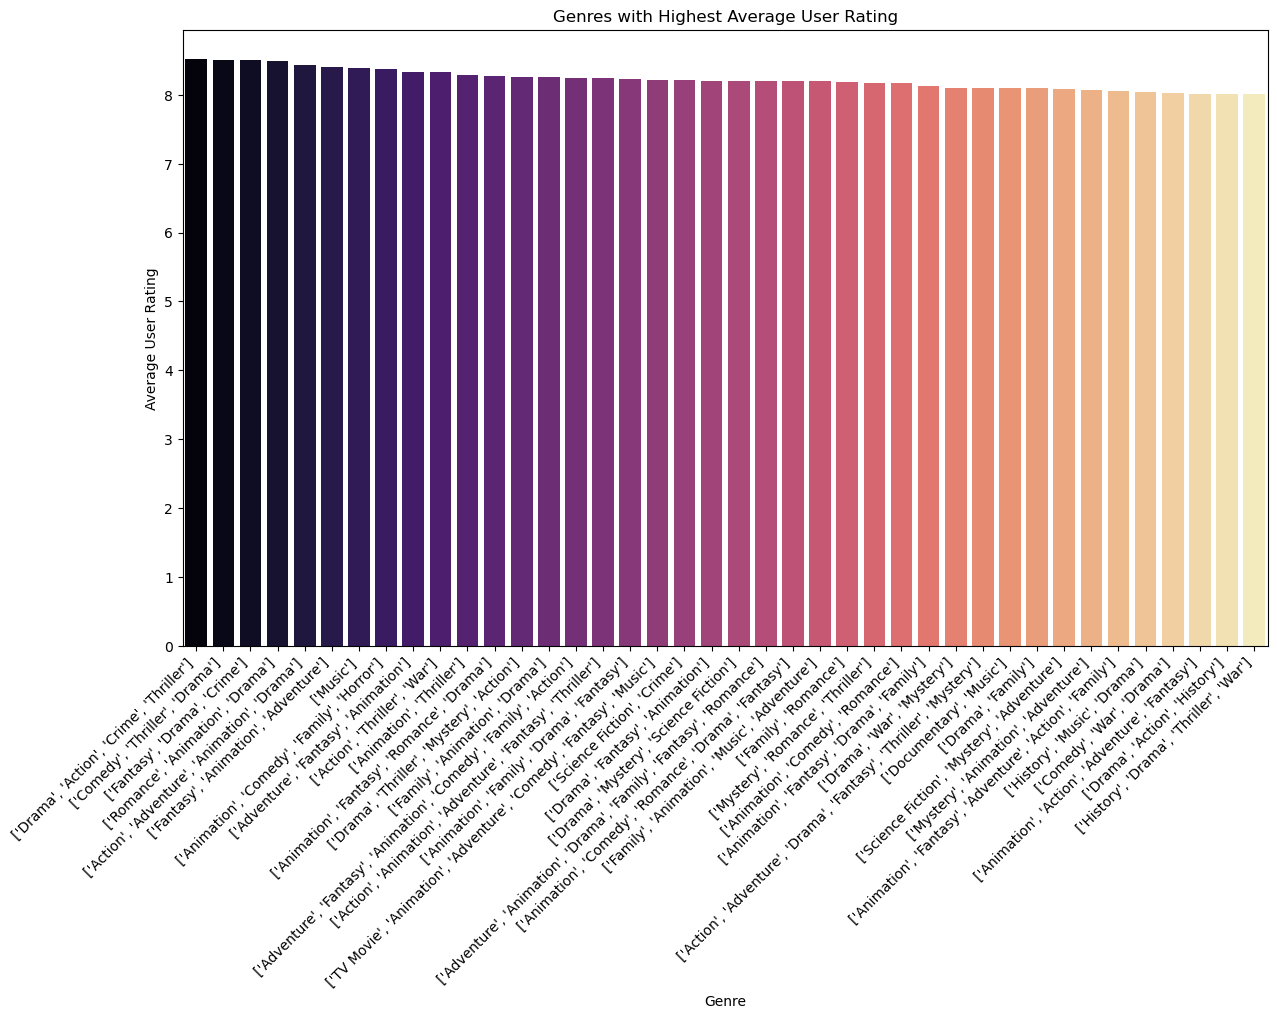

In [38]:
plt.figure(figsize=(14, 8))
sns.barplot(x=highest_user_genres.index, 
            y=highest_user_genres.values, ci=None, palette='magma')
plt.title('Genres with Highest Average User Rating')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/highest_avg_user_rated_genres.png', bbox_inches='tight')

The chart visulizes movie genres that consistently receive high user ratings. The combination of 'Drama', 'Action', 'Crime', and 'Thriller' genres tops the list with an impressive average rating of 8.515. Comedy combined with thriller and drama follows closely with an average rating of 8.512.

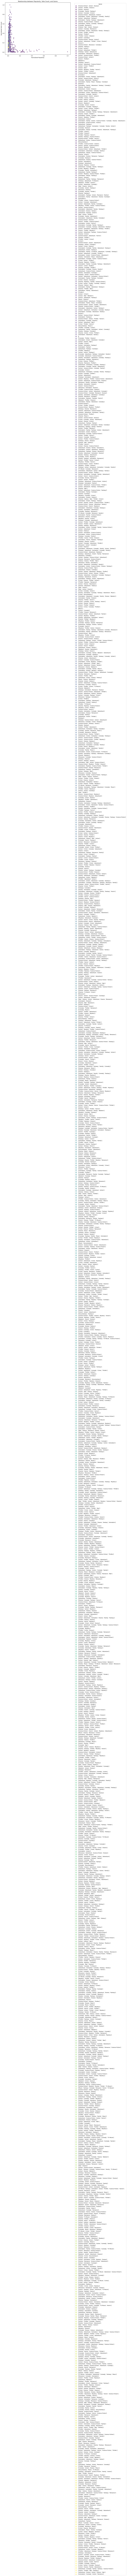

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='popularity_normalized', y='vote_count_normalized', 
                data=tmdb_df, hue='genre_ids_str', palette='viridis', alpha=0.7)
plt.title('Relationship between Popularity, Vote Count, and Genre')
plt.xlabel('Normalized Popularity')
plt.ylabel('Normalized Vote Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')



The scatter plot visually represents the relationship between normalized popularity, normalized vote count, and movie genres. Each point on the plot corresponds to a movie in the dataset (the one at 1.0 is more than likely the Beekeper), and the position of the point is determined by its normalized popularity on the x-axis and normalized vote count on the y-axis. The movies based on normalized popularity are concentrated around the range of 0.0 to 0.1 on the x-axis. Similarly, normalized vote counts are clustered around the range of 0.0 to 0.7 on the y-axis.


In [40]:
# Save the DataFrame to a CSV file
tmdb_df.to_csv('../data/tmdb_data.csv', index=False)
